# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### DATASET EXPLORATION AND CLEANING

In [1]:
import numpy as np
import pandas as pd
import colorama
from colorama import Fore, Back, Style

#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)


train_dataset=pd.read_csv('train.csv',index_col=0)
test_dataset=pd.read_csv('test.csv',index_col=0)

In [2]:
#Visualize the first lines of the train dataset:
print(Fore.BLUE+'FIRST ROWS OF TITANIC TRAIN DATASET:\n')
display(train_dataset.head())

#Visualize information and statistics about the train dataset:
print(Fore.BLUE+'INFO SUMMARY FOR TITANIC TRAIN DATASET: \n'+Fore.RESET)
display(train_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR TITANIC TRAIN DATASET: \n')
display(train_dataset.describe())

FIRST ROWS OF TITANIC TRAIN DATASET:



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


INFO SUMMARY FOR TITANIC TRAIN DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


None

DESCRIPTIVE STATS FOR TITANIC TRAIN DATASET: 



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#Visualize the first lines of the test dataset:
print(Fore.BLUE+'FIRST ROWS OF TITANIC TEST DATASET:\n')
display(test_dataset.head())

#Visualize information and statistics about the test dataset:
print(Fore.BLUE+'INFO SUMMARY FOR TITANIC TEST DATASET: \n'+Fore.RESET)
display(test_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR TITANIC TEST DATASET: \n')
display(test_dataset.describe())

FIRST ROWS OF TITANIC TEST DATASET:



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


INFO SUMMARY FOR TITANIC TEST DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


None

DESCRIPTIVE STATS FOR TITANIC TEST DATASET: 



,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
#check for duplicate
print(Fore.BLUE+'Duplicates for TRAIN DATASET: \n'+Fore.RESET,train_dataset.duplicated().sum())
print(Fore.BLUE+'Duplicates for TEST DATASET: \n'+Fore.RESET,test_dataset.duplicated().sum())

Duplicates for TRAIN DATASET: 
 0
Duplicates for TEST DATASET: 
 0


In [5]:
#Check NA values:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum()*100/len(train_dataset))
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum()*100/len(test_dataset))

% NA values for TRAIN DATASET: 
 Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64
% NA values for TEST DATASET: 
 Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64


In [6]:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum())
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum())

% NA values for TRAIN DATASET: 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
% NA values for TEST DATASET: 
 Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [7]:
#Lots of missing values in the columns Age and Cabin. 
#too many missing values in Cabin: let's drop it. Let's replace missing values of the variable Age
train_dataset.drop(['Cabin','Name','Ticket'], inplace=True, axis=1)
test_dataset.drop(['Cabin','Name','Ticket'], inplace=True, axis=1)

train_dataset['Age'].fillna(train_dataset['Age'].median(),inplace=True)
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0],inplace=True)
test_dataset['Age'].fillna(test_dataset['Age'].median(),inplace=True)
test_dataset['Fare'].fillna(test_dataset['Fare'].median(),inplace=True)


#### DATA VISUALISATION

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
feats_cat=list(train_dataset.select_dtypes(include='object'))

for feats in train_dataset[feats_cat]:
    print(train_dataset[feats].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


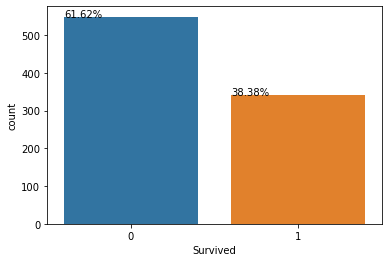

In [10]:
#fig,ax=plt.subplots(figsize=(5,5))

ax=sns.countplot(train_dataset['Survived'])
for p in ax.patches:
    percent = '{:.2f}%'.format(100 * p.get_height()/len(train_dataset))
    x = p.get_x()
    y = p.get_height()
    ax.text(x,y,percent)

#as expected dataset is imbalanced

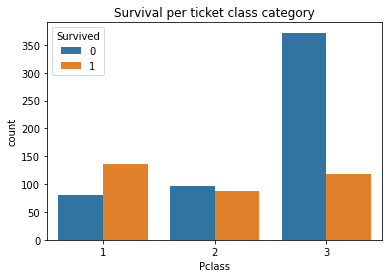

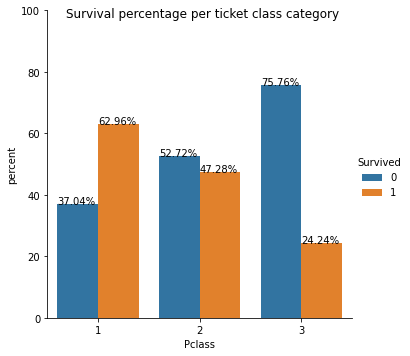

In [11]:

f=sns.countplot(x='Pclass',hue='Survived', data=train_dataset)
f.set_title('Survival per ticket class category')

x,y='Pclass','Survived'
df1 = train_dataset.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.fig.suptitle('Survival percentage per ticket class category')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


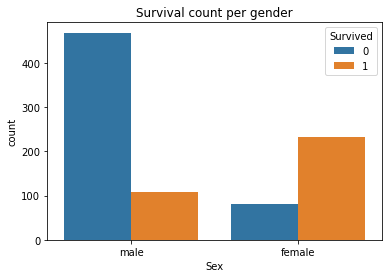

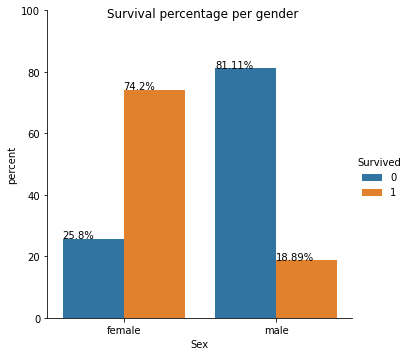

In [12]:

f=sns.countplot(x='Sex',data=train_dataset, hue='Survived')
f.set_title('Survival count per gender')
x,y='Sex','Survived'
df2=train_dataset.groupby(x)[y].value_counts(normalize=True)
df2=df2.mul(100)
df2=df2.rename('percent').reset_index()

g=sns.catplot(x=x, y='percent', hue=y,kind='bar', data=df2)
g.ax.set_ylim(0,100)
g.fig.suptitle('Survival percentage per gender')
for p in g.ax.patches:
    txt=str(p.get_height().round(2))+ '%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    

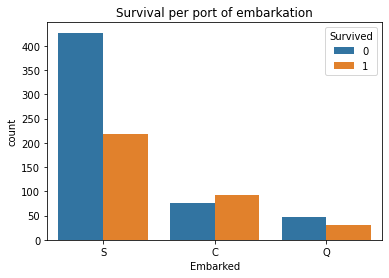

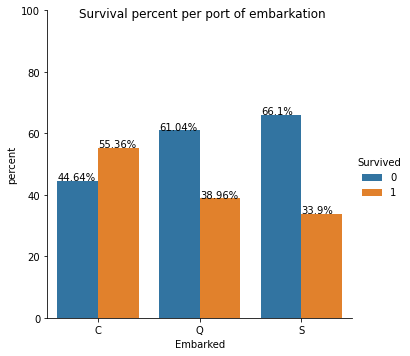

In [13]:
f=sns.countplot(x='Embarked',hue='Survived',data=train_dataset)
f.set_title('Survival per port of embarkation')

x,y='Embarked','Survived'
df3=train_dataset.groupby(x)[y].value_counts(normalize=True)
df3=df3.mul(100)
df3=df3.rename('percent').reset_index()


g=sns.catplot(x=x, y='percent', hue=y,kind='bar', data=df3)
g.fig.suptitle('Survival percent per port of embarkation')
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt=str(p.get_height().round(2))+'%'
    txt_x=p.get_x()
    txt_y=p.get_height()
    g.ax.text(txt_x,txt_y,txt)
 
    

,SibSp,Survived,percent
0,0,0,65.46
1,0,1,34.54
2,1,1,53.59
3,1,0,46.41
4,2,0,53.57
5,2,1,46.43
6,3,0,75.00
7,3,1,25.00
8,4,0,83.33
9,4,1,16.67


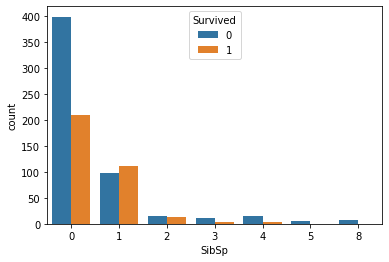

In [14]:
f=sns.countplot(x='SibSp', hue='Survived', data=train_dataset)
x,y='SibSp','Survived'
df4=train_dataset.groupby(x)[y].value_counts(normalize=True)
df4=df4.mul(100).round(2)
df4.rename('percent').reset_index()



<AxesSubplot:xlabel='Survived', ylabel='Age'>

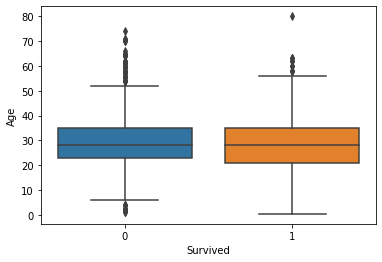

In [15]:
sns.boxplot(x='Survived',y='Age',data=train_dataset)

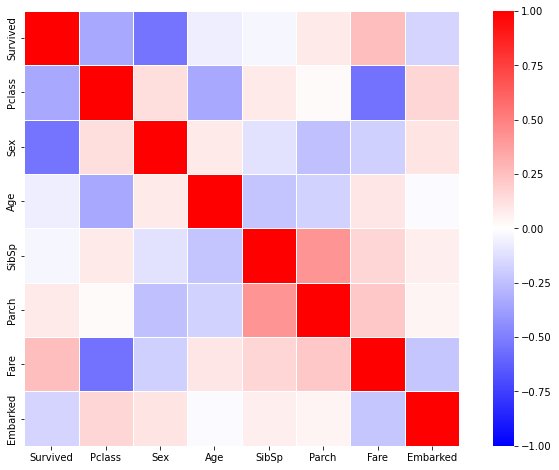

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train_dataset.assign(Pclass = train_dataset.Pclass.astype('category').cat.codes,
                      Sex = train_dataset.Sex.astype('category').cat.codes,
                      Embarked = train_dataset.Embarked.astype('category').cat.codes).corr(),
                    
                      annot = False, cmap = 'bwr',vmin = -1, vmax = 1, square = True, linewidths = 0.5)
plt.show()


In [17]:
cor=train_dataset.corr()
cor_target=abs(cor['Survived'])
non_relevant_features = cor_target[cor_target<0.2]
print(non_relevant_features)

Age      0.064910
SibSp    0.035322
Parch    0.081629
Name: Survived, dtype: float64


In [18]:
train_dataset.drop(non_relevant_features.index, axis=1,inplace=True)
test_dataset.drop(non_relevant_features.index, axis=1,inplace=True)

In [19]:

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 41.8+ KB


In [20]:
y_train=train_dataset['Survived']
X_train=train_dataset.drop('Survived', axis=1)

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [22]:
from collections import Counter
print (Counter(y_train))

Counter({0: 549, 1: 549})


In [23]:
from sklearn.preprocessing import OrdinalEncoder
feats_cat=list(X_train.select_dtypes(include='object'))
feats_num=list(X_train.select_dtypes(exclude='object'))

# Create encoder
oe = OrdinalEncoder()

# Fit on training data and transform
X_train[feats_cat] = oe.fit_transform( X_train[feats_cat])
X_test=test_dataset
X_test[feats_cat]=oe.transform(X_test[feats_cat])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns]= scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

#### Support Vector Machine

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
SVM=SVC()
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 5],'gamma':('scale', 'auto')}

clf = GridSearchCV(SVM, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [26]:
print(clf.best_params_)


{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
from sklearn.metrics import classification_report

SVM_opt=SVC(C=1,gamma='auto',kernel='sigmoid')
SVM_opt.fit(X_train,y_train)
SVM_pred_train=SVM_opt.predict(X_train)
print(Fore.BLUE+"Testing performance"+Fore.RESET)
print ("SVC score:{:.2f} ".format(SVM_opt.score(X_train, y_train)))
print(Fore.BLUE+"Classification report:\n"+Fore.RESET,classification_report(SVM_pred_train, y_train))

Testing performance
SVC score:0.77 
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       641
           1       0.68      0.82      0.75       457

    accuracy                           0.77      1098
   macro avg       0.77      0.78      0.77      1098
weighted avg       0.78      0.77      0.77      1098



In [28]:
SVM_pred_test=SVM_opt.predict(X_test)
submission_titanic_3 = pd.DataFrame({'PassengerId':X_test.index, 'Survived':SVM_pred_test})
submission_titanic_3.set_index('PassengerId',inplace=True)
submission_titanic_3.to_csv('submission_titanic_3.csv')



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


selector=SelectKBest()
GBC=GradientBoostingClassifier()
GBC_pipe=Pipeline(steps=[('selection',selector),
                         ('estimator',GBC)])

param_grid = {
    'selection__k' : [1, 2, 3, 'all'], 
     'estimator__loss':['log_loss','deviance','exponential'],
     'estimator__learning_rate':[0.1,0.2,0.3],
      'estimator__max_features':['auto', 'sqrt', 'log2']
}

grid=GridSearchCV(param_grid=param_grid,estimator=GBC_pipe,cv=5)

grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8288418430884184
{'estimator__learning_rate': 0.3, 'estimator__loss': 'deviance', 'estimator__max_features': 'auto', 'selection__k': 'all'}


C:\Users\celin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\celin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\celin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\celin\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\celin\anaconda3\lib\

In [30]:
sel = SelectKBest( k=3)
sel.fit(X_train,y_train)

#Training and predictions
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)
GBC_opt = GradientBoostingClassifier( learning_rate=0.3, random_state=49,
 loss='deviance', max_features='auto')
GBC_opt.fit(X_train_sel, y_train)

#Predictions
GBC_pred_train=GBC_opt.predict(X_train_sel)
print(Fore.BLUE+"Testing performance"+Fore.RESET)
print ("GBC score:{:.2f} ".format(GBC_opt.score(X_train_sel, y_train)))
print(Fore.BLUE+"Classification report:\n"+Fore.RESET,classification_report(GBC_pred_train, y_train))

Testing performance
GBC score:0.90 
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       573
           1       0.88      0.92      0.90       525

    accuracy                           0.90      1098
   macro avg       0.90      0.90      0.90      1098
weighted avg       0.90      0.90      0.90      1098



In [31]:
GBC_pred_test=GBC_opt.predict(X_test_sel)
submission_titanic_4 = pd.DataFrame({'PassengerId':X_test.index, 'Survived':GBC_pred_test})
submission_titanic_4.set_index('PassengerId',inplace=True)
submission_titanic_4.to_csv('submission_titanic_4.csv')